# CryptoBIT project ->module: historic projection
----------------------------------------------
### the main workbook accompanying the DASH-board about "MST'-graph depicting CryptoMarket

* **INFO:** data spurce: www.kaggle.com/philmohun/cryptocurrency-financial-data -prepered in advance
* **CONCEPT:** 1Year visual-projection of **MSTgraph** i.e.: **'2017-02-01':'2018-02-01' simulation window**

* **THESIS:**  * **+/-ε** "Potential of **"Miniaml Spanning Tree"** graph in **CryptoMarket Crashes Preditions**" *
* **further:** review of correlation.matrix to euclidean.distance transformation for proper MST.graph projection..

In [1]:
from datetime import date
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

In [3]:
from IPython.display import display
import ipywidgets as widgets

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import offline
offline.init_notebook_mode()

In [5]:
historic_df = pd.read_csv('crypto_history_top50', header=0, index_col=0, parse_dates=True)
historic_df.tail(3)

bitcoin  ethereum    ripple  bitcoin-cash  cardano   stellar  \
Date                                                                       
2016-11-02   740.83     10.75  0.008222           NaN      NaN  0.002023   
2016-11-01   729.79     10.77  0.008102           NaN      NaN  0.001976   
2016-10-31   700.97     11.00  0.008196           NaN      NaN  0.002088   

                 neo  litecoin  eos       nem      ...        kucoin-shares  \
Date                                               ...                        
2016-11-02  0.197941      4.10  NaN  0.003749      ...                  NaN   
2016-11-01  0.211322      4.09  NaN  0.003828      ...                  NaN   
2016-10-31  0.228251      3.99  NaN  0.003629      ...                  NaN   

            rchain  aeternity  dogecoin    decred  komodo  hshare  gas  ark  \
Date                                                                          
2016-11-02     NaN        NaN  0.000220  0.709144     NaN     NaN  NaN  NaN   
2016-11-01     NaN        NaN  0.000221  0.711819     NaN     NaN  NaN  NaN   
2016-10-31     NaN        NaN  0.000220  0.692514     NaN     NaN  NaN  NaN   

            kyber-network  
Date                       
2016-11-02            NaN  
2016-11-01            NaN  
2016-10-31            NaN  

[3 rows x 50 columns]

#### step_e01: crypto.coins selection ->condition: continuity of quotations in given time-horizon '2016-10-31' - '2018-02-01'
--------------

In [6]:
delta = (date(2018, 2, 1) - date(2016, 10, 31)).days
historic_df = historic_df.loc[:, historic_df.notna().sum() > delta]
historic_df.tail(2)

bitcoin  ethereum    ripple   stellar       neo  litecoin  \
Date                                                                    
2016-11-01   729.79     10.77  0.008102  0.001976  0.211322      4.09   
2016-10-31   700.97     11.00  0.008196  0.002088  0.228251      3.99   

                 nem  dash  monero      lisk    ...        steem   stratis  \
Date                                            ...                          
2016-11-01  0.003828  9.04    4.71  0.162529    ...     0.122442  0.055675   
2016-10-31  0.003629  9.20    5.12  0.162747    ...     0.131459  0.051525   

            bitshares  bytecoin-bcn   siacoin     verge     waves  augur  \
Date                                                                       
2016-11-01   0.004103      0.000058  0.000354  0.000022  0.345782   4.05   
2016-10-31   0.004173      0.000056  0.000377  0.000025  0.328016   4.45   

            dogecoin    decred  
Date                            
2016-11-01  0.000221  0.711819  
2016-10-31  0.000220  0.692514  

[2 rows x 23 columns]

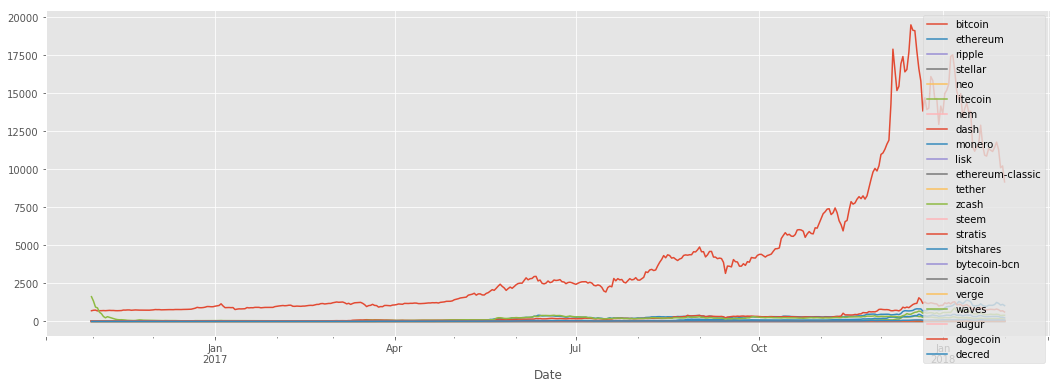

In [7]:
historic_df.plot(figsize=(18, 6));

#### step_e02: time-series stationarization via log-returns calculation ->in consequence '2016-11-01'-'2018-02-01' of rate-returns
------------

In [8]:
histrate_df = np.log((historic_df / historic_df.shift(-1)).dropna())    # 'tether'-coin case..

In [9]:
histrate_df.tail(1)

bitcoin  ethereum    ripple   stellar       neo  litecoin  \
Date                                                                     
2016-11-01  0.040292 -0.021131 -0.011535 -0.055132 -0.077063  0.024754   

                 nem      dash    monero     lisk    ...        steem  \
Date                                                 ...                
2016-11-01  0.053385 -0.017544 -0.083467 -0.00134    ...    -0.071058   

             stratis  bitshares  bytecoin-bcn   siacoin     verge     waves  \
Date                                                                          
2016-11-01  0.077464  -0.016917      0.035091 -0.062948 -0.127833  0.052746   

               augur  dogecoin    decred  
Date                                      
2016-11-01 -0.094187  0.004535  0.027495  

[1 rows x 23 columns]

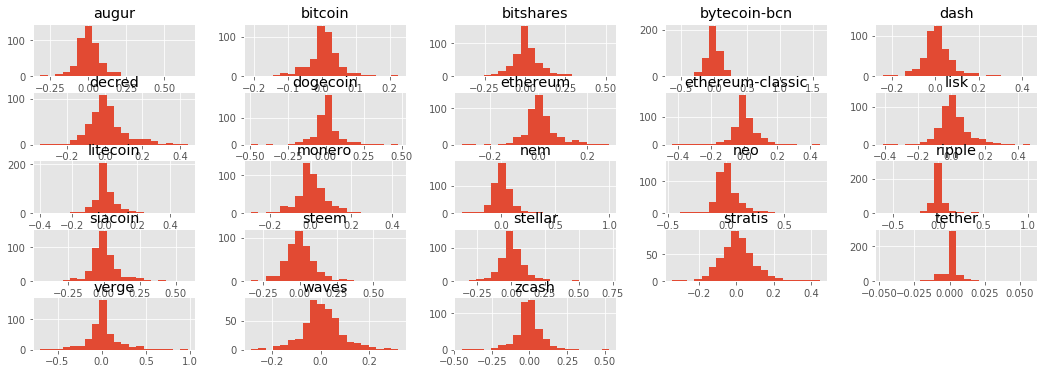

In [10]:
histrate_df.hist(figsize=(18, 6), bins=20);

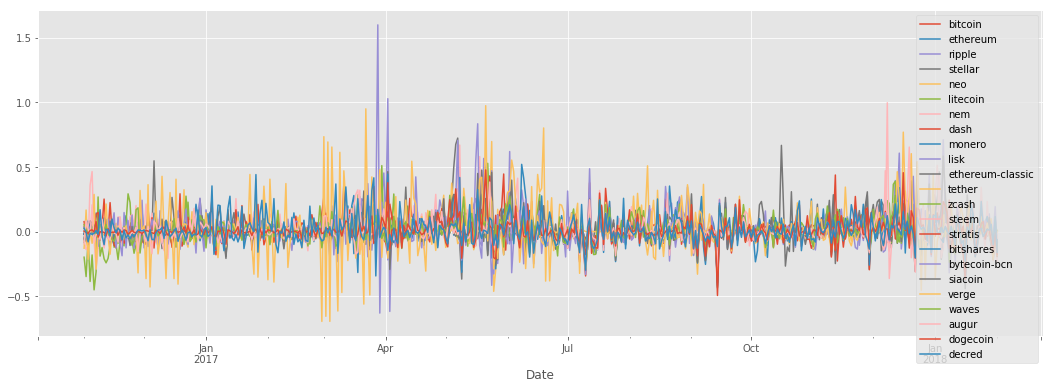

In [11]:
histrate_df.plot(figsize=(18, 6));

In [13]:
@widgets.interact(delete=False)              # problematic case of 'theter' -lack of correlation with other coins
def case_tether(delete=False):               #   -> distracpted structure of MSTgraph: 'tether' still attention ;D
    if delete:                               #   -> tether protected by USD parity?
        histrate_df.drop(['tether'], axis=1, inplace=True)
    
histrate_df.columns

interactive(children=(Checkbox(value=False, description='delete'), Output()), _dom_classes=('widget-interact',…

Index(['bitcoin', 'ethereum', 'ripple', 'stellar', 'neo', 'litecoin', 'nem',
       'dash', 'monero', 'lisk', 'ethereum-classic', 'zcash', 'steem',
       'stratis', 'bitshares', 'bytecoin-bcn', 'siacoin', 'verge', 'waves',
       'augur', 'dogecoin', 'decred'],
      dtype='object')

#### step_e03: example of return.rates correlation.matrix transformation to euklidean.distance ->essence of MSTgraph construction mechanism
------------

In [14]:
# demonstrative MSTgraph construction based 1year-wide corr-matrix of crypto-returns
example_df = histrate_df.loc['20180201':'20170201']

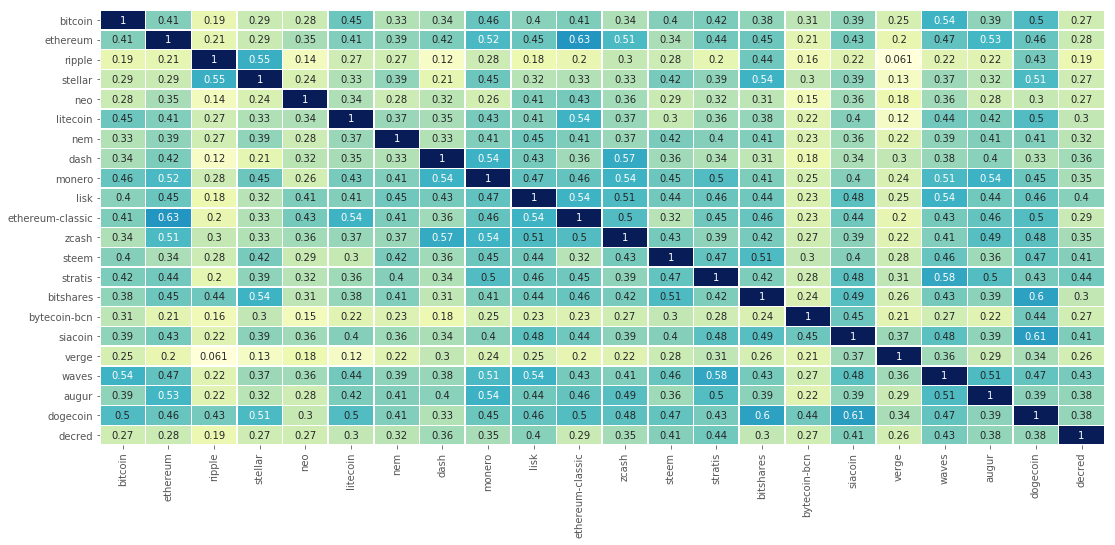

In [15]:
fig, ax = plt.subplots(figsize=(18, 8)) 
sns.heatmap(example_df.corr(), annot=True, cbar=False, linewidths=.5, cmap="YlGnBu", ax=ax)

In [16]:
corr_matrix = example_df.corr().stack().reset_index()
corr_matrix.columns = ['coin1', 'coin2', 'weight']
graph_matrice = corr_matrix.loc[(corr_matrix['coin1'] != corr_matrix['coin2'])] 

In [17]:
graph_TS = nx.from_pandas_edgelist(graph_matrice, 'coin1', 'coin2', ['weight'])
graph_MST = nx.minimum_spanning_tree(graph_TS) 

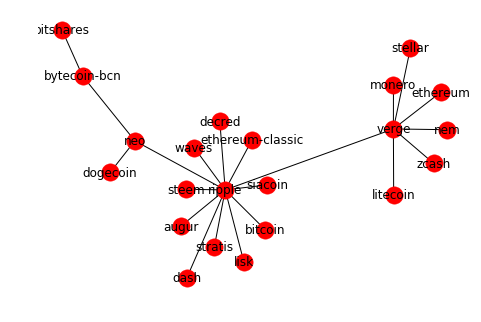

In [18]:
nx.draw(graph_MST, with_labels=True, figsize=(20, 10))

#### step_e04: defining rolling-correlation to Xday-period ->animation data.supply constant in range '2017-02-01':'2018-02-01'
------------

In [19]:
slider = widgets.IntSlider(min=10, max=92,step=1, value=45)
display(slider)            # 10-92 days range for rolling-correlation scope

IntSlider(value=45, max=92, min=10)

In [20]:
rolling_corr = slider.value                   # day-unit: rolling-correlation window for MSTgraph construction      
data_year_df = histrate_df.head(366)
data_tail_df = histrate_df.tail(92)

animation_df = pd.concat( [data_year_df, data_tail_df.shift(-rolling_corr).dropna()] )

interval = 10                                 # day-unit: interval -animation seqenece-step (366 days range)
windows = list(range( len(data_year_df) ))[::interval]
windows.append( len(data_year_df)-1 )

#### step_e05: main mechanism: loop for MST-parametes collection in moving window 1day per.step 
** *+data aggregation for whole animation routine:  info seperately fo nodes, edges and iterated steps for sequence of plots constructions* **
* moving correlation.matrix transformed in MSTgraphs edges weighted-structere (where nodes are preselected crypto.coins) for every window-frame
------------

In [21]:
edge_trace_all = []
node_trace_all = []
step_counters = []

for window in windows:
    looper_df = animation_df.iloc[ window:(rolling_corr + window) ]  
    
    # custom corr-matrix estimation (diagonal disposal)
    corr_matrix = looper_df.corr().stack().reset_index()
    corr_matrix.columns = ['coin1', 'coin2','weight']
    graph_matrice = corr_matrix.loc[ corr_matrix['coin1'] != corr_matrix['coin2'] ] 
        
    # package 'networkx': standard graph construction based of corr-matrix (distance)
    # ->then transmutation to MST -structure with smallest possible sum of weighted-edges
    graph_TS = nx.from_pandas_edgelist(graph_matrice, 'coin1', 'coin2', ['weight'])
    graph_MST = nx.minimum_spanning_tree(graph_TS) 
        
    # graph-nedes coordinates estimiation: callibration bitcoin-coin central position
    fix_posit = {'bitcoin': (0,0)}
    fix_nodes = fix_posit.keys()
    positions = nx.spring_layout(
        graph_MST, weight='weight', pos=fix_posit, fixed=fix_nodes, scale=2, center=(0,0))
    
    # base centrality-metrix calculation: general betweeness & distance to bitcoin
    bitcenter = nx.single_source_shortest_path_length(graph_MST, 'bitcoin')
    betweenness = nx.betweenness_centrality(graph_MST)
    
    # package 'plotly': edge traces-contruction
    edge_trace = go.Scatter(
        x = [],
        y = [],
        line = dict(width=1.5, color='#888'), 
        opacity = 0.3,
        hoverinfo = 'none',
        name = window,
        mode = 'lines')
    
    # plot parametrization -position of edges coordinates
    for edge1, edge2, weight in graph_MST.edges().data('weight'):
        x0, y0 = positions[edge1]
        x1, y1 = positions[edge2]
        edge_trace['x'] += tuple( [x0, x1, None] )
        edge_trace['y'] += tuple( [y0, y1, None] ) 
        
    # package 'plotly': node traces-contruction
    node_trace = go.Scatter(
        x = [],
        y = [],
        text = [],
        hoverinfo = 'text',
        name = window,
        mode = 'markers', 
        marker = dict(
            showscale = True,
            colorscale='YlGnBu', 
            reversescale = False,
            opacity = 0.9,
            cmin = 0.0,
            cmax = 0.6,
            size = [],
            color = [],
            colorbar = dict(
                thickness = 12,
                title = "Graph Centrality Metrics: Degree [size] & Betweenes [color]",
                xanchor = 'left',
                titleside = 'right'),
            line = dict(width = [], color='black')) )
    
    # plot parametrization -position of nodes coordinates
    for node in graph_MST.nodes():
        x, y = positions[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])

    # information for interactive display specification
    for n, nghbr in enumerate(graph_MST.adjacency()):
        # print("n: {}  + {}".format(n, nghbr[1]))
        node_trace['marker']['color'] += tuple( [betweenness[nghbr[0]]] )
        node_trace['marker']['size'] += tuple( [len(nghbr[1]) * 5 + 20] ) 
        node_trace['marker']['line']['width'] += tuple([2 if nghbr[0] == 'bitcoin' else .2])
        node_trace['text'] += tuple([
            "COIN: <b>> {} <</b>"
            "<br><i>distance to Bitcoin: {}</i>"
            "<br><i>neighbours: {}</i>"
            "<br><i>betweenness: {}</i>"
            "".format(nghbr[0], bitcenter[nghbr[0]], len(nghbr[1]), round(betweenness[nghbr[0]],6)) ])
    
    # moved-steps counter for animation's slider pursposes
    step_count = dict(
        method = 'animate',
        label = window,
        args = [[ round(window/interval) ], dict(frame = dict(duration=400, redraw=False), 
                                                 mode = 'immediate', transition = dict(duration=800))] )
                                        # 
                                               #transition = dict(duration=200))] )
    
    edge_trace_all.append(edge_trace)
    node_trace_all.append(node_trace)
    step_counters.append(step_count)

#### step_e06:  python-plotly visual easthetic specification ->slider interactive component for animation
------------

In [22]:
layout = go.Layout(
    updatemenus = [dict(
        buttons = [
            dict(label='▶',
                 method='animate', 
                 args=[None, dict(frame = dict(duration=400, redraw=False),      
                                  fromcurrent = True,
                                  transition = dict(duration=800, easing='quadratic-in-out'))]),
            dict(label='▮▮',
                 method='animate', 
                 args=[[None], dict(frame = dict(duration=0, redraw=True),      
                                    mode = 'immediate',
                                    transition = dict(duration=0))]) ],          
        direction = 'left',
        pad = dict(r=10, t=87),
        showactive = True,
        type = 'buttons',
        x = 0.1,
        y = 0,
        xanchor = 'right',
        yanchor = 'top') ],
    sliders = [dict(
        active = 0,
        yanchor = 'top',
        xanchor = 'left',
        currentvalue = dict(font=dict(size=20), prefix='Day:', visible=True, xanchor='right'),
        transition = dict(duration=800, easing='cubic-in-out'),
        pad = dict(b=5, t=5),
        len = 0.9,
        x = 0.1,
        y = 0,
        steps = step_counters) ],
    title = '<br><b>MST graph representation of Cryptocurrency Market</b>',
    titlefont = dict(size=15),
    showlegend = False,
    hovermode = 'closest',
    margin = dict(b=5, l=5, r=5, t=50),
    annotations = [dict(
        # text = "Python code: <a href='https://plot.ly'>PLOTLY</a>",
        showarrow = False,
        xref = "paper", 
        yref="paper",
        x = 0.005, 
        y=-0.002) ],
    xaxis = dict(showgrid=False, zeroline=False, showticklabels=False, range=[-3.5,4]),  
    yaxis = dict(showgrid=False, zeroline=False, showticklabels=False, range=[-5,5]))

#### step_e07: demonstrative simulation -> MSTgraph '1day-per-1year' projection
* **ESSENCE:** "Minimal Spanning Tree" depicts window-moving structer of CryptoCoins mutual dependencies (**correlation-to-euclidean.distance**)
------------

In [23]:
figure = go.Figure(
    data = [edge_trace_all[0], node_trace_all[0]], #, combo_trace_all[len(node_trace_all)+1]],
    layout = layout,
    frames = [{'data': [edge_trace_all[i], node_trace_all[i]], 'name': i
              } for i in range(1, len(windows))] ) 
              #+ [{'data': [edge_trace_all[-1], node_trace_all[-1]], 'layout':{'title':'<b>-THE END-</b>'}}] )

offline.iplot(figure, filename='networkx')

##### THE END!